In [1]:
from deim_wrapper import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [3]:
model = load_model("deim_hgnetv2_s")

2025-03-09 23:09:28.218 | INFO     | deim_wrapper.predictor:__init__:35 - Initializing Predictor with device=auto
2025-03-09 23:09:28.349 | INFO     | deim_wrapper.predictor:__init__:54 - Auto-selected device: cuda
2025-03-09 23:09:28.394 | INFO     | deim_wrapper.predictor:_download_checkpoint:154 - Using cached checkpoint from /home/dnth/.cache/deim/checkpoints/deim_hgnetv2_s.pth
2025-03-09 23:09:28.396 | DEBUG    | deim_wrapper.predictor:__init__:78 - Successfully initialized distributed environment
2025-03-09 23:09:28.397 | INFO     | deim_wrapper.predictor:__init__:89 - Loading configuration from model name: deim_hgnetv2_s
2025-03-09 23:09:28.726 | SUCCESS  | deim_wrapper.predictor:__init__:133 - Predictor initialization complete


In [4]:
image_path = '/home/dnth/Downloads/sample_images/coco/000000000785.jpg'

result = model.predict(image_path, visualize=True, save_path='out.jpg')
result

2025-03-09 23:09:28.731 | DEBUG    | deim_wrapper.predictor:predict:178 - Loading image from path: /home/dnth/Downloads/sample_images/coco/000000000785.jpg
2025-03-09 23:09:29.043 | DEBUG    | deim_wrapper.predictor:predict:212 - Prediction complete. Found 3 objects
2025-03-09 23:09:29.043 | DEBUG    | deim_wrapper.predictor:predict:215 - Generating visualization


{'boxes': array([[279.81665 ,  42.740967, 493.68127 , 390.3882  ],
        [209.37361 , 366.36148 , 612.8235  , 400.9716  ],
        [209.03262 , 369.64557 , 440.538   , 400.89368 ]], dtype=float32),
 'labels': array([ 0, 30, 30]),
 'scores': array([0.9296187 , 0.71767473, 0.28111368], dtype=float32),
 'visualization': <PIL.Image.Image image mode=RGB size=640x425>}

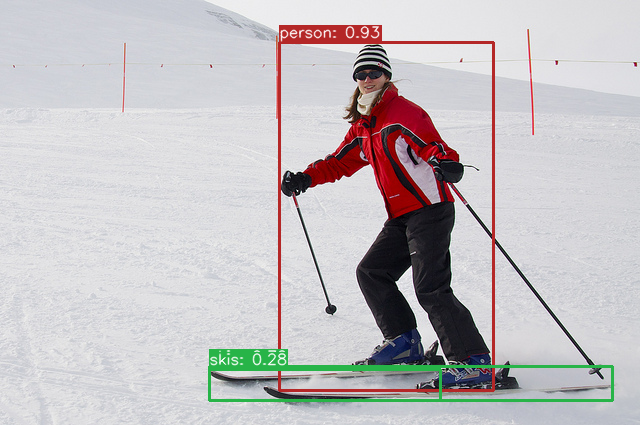

In [5]:
result["visualization"]

In [6]:
# Load folder of images
import glob
image_paths = glob.glob('/home/dnth/Downloads/sample_images/coco/*.jpg')

image_paths



['/home/dnth/Downloads/sample_images/coco/000000002587.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000007088.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000005193.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000001761.jpg',
 '/home/dnth/Downloads/sample_images/coco/basset_hound_1.jpg',
 '/home/dnth/Downloads/sample_images/coco/Bombay_1.jpg',
 '/home/dnth/Downloads/sample_images/coco/beagle_6.jpg',
 '/home/dnth/Downloads/sample_images/coco/000000000785.jpg',
 '/home/dnth/Downloads/sample_images/coco/Abyssinian_1.jpg']

In [7]:
results = model.predict_batch(image_paths, visualize=True)

2025-03-09 23:09:29.088 | INFO     | deim_wrapper.predictor:predict_batch:249 - Processing batch of 9 images with batch_size=16
2025-03-09 23:09:29.089 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 0 from path: /home/dnth/Downloads/sample_images/coco/000000002587.jpg
2025-03-09 23:09:29.098 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 1 from path: /home/dnth/Downloads/sample_images/coco/000000007088.jpg
2025-03-09 23:09:29.113 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 2 from path: /home/dnth/Downloads/sample_images/coco/000000005193.jpg
2025-03-09 23:09:29.125 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 3 from path: /home/dnth/Downloads/sample_images/coco/000000001761.jpg
2025-03-09 23:09:29.134 | DEBUG    | deim_wrapper.predictor:predict_batch:262 - Loading image 4 from path: /home/dnth/Downloads/sample_images/coco/basset_hound_1.jpg
2025-03-09 23:09:29.144 | DEBUG    | deim_wrapper.

In [8]:
results

[{'boxes': array([[5.1616550e+01, 1.0150789e+02, 4.5006342e+02, 3.5571924e+02],
         [4.7051041e+01, 1.0620430e+00, 4.5206799e+02, 3.5725018e+02],
         [2.8507532e+02, 3.1976931e+01, 4.6790289e+02, 9.1475830e+01],
         [2.2573769e-01, 3.8552284e-01, 4.9984546e+02, 3.7228610e+02]],
        dtype=float32),
  'labels': array([46, 46, 79, 71]),
  'scores': array([0.6862255, 0.5424962, 0.3804256, 0.2844021], dtype=float32),
  'visualization': <PIL.Image.Image image mode=RGB size=500x375>},
 {'boxes': array([[1.79780365e+02, 2.11072311e+02, 2.75251831e+02, 4.63964905e+02],
         [8.40095520e+01, 1.72611755e+02, 3.07510162e+02, 2.63154663e+02],
         [2.31955856e+02, 1.52881409e+02, 3.03018829e+02, 1.81034317e+02],
         [6.86667709e+01, 1.73686401e+02, 9.00752487e+01, 1.92375824e+02],
         [9.52154083e+01, 1.80226379e+02, 1.10238853e+02, 1.91730942e+02],
         [3.01472931e+02, 1.66503723e+02, 3.73084198e+02, 1.91719238e+02],
         [2.31505035e+02, 1.53176712e+0

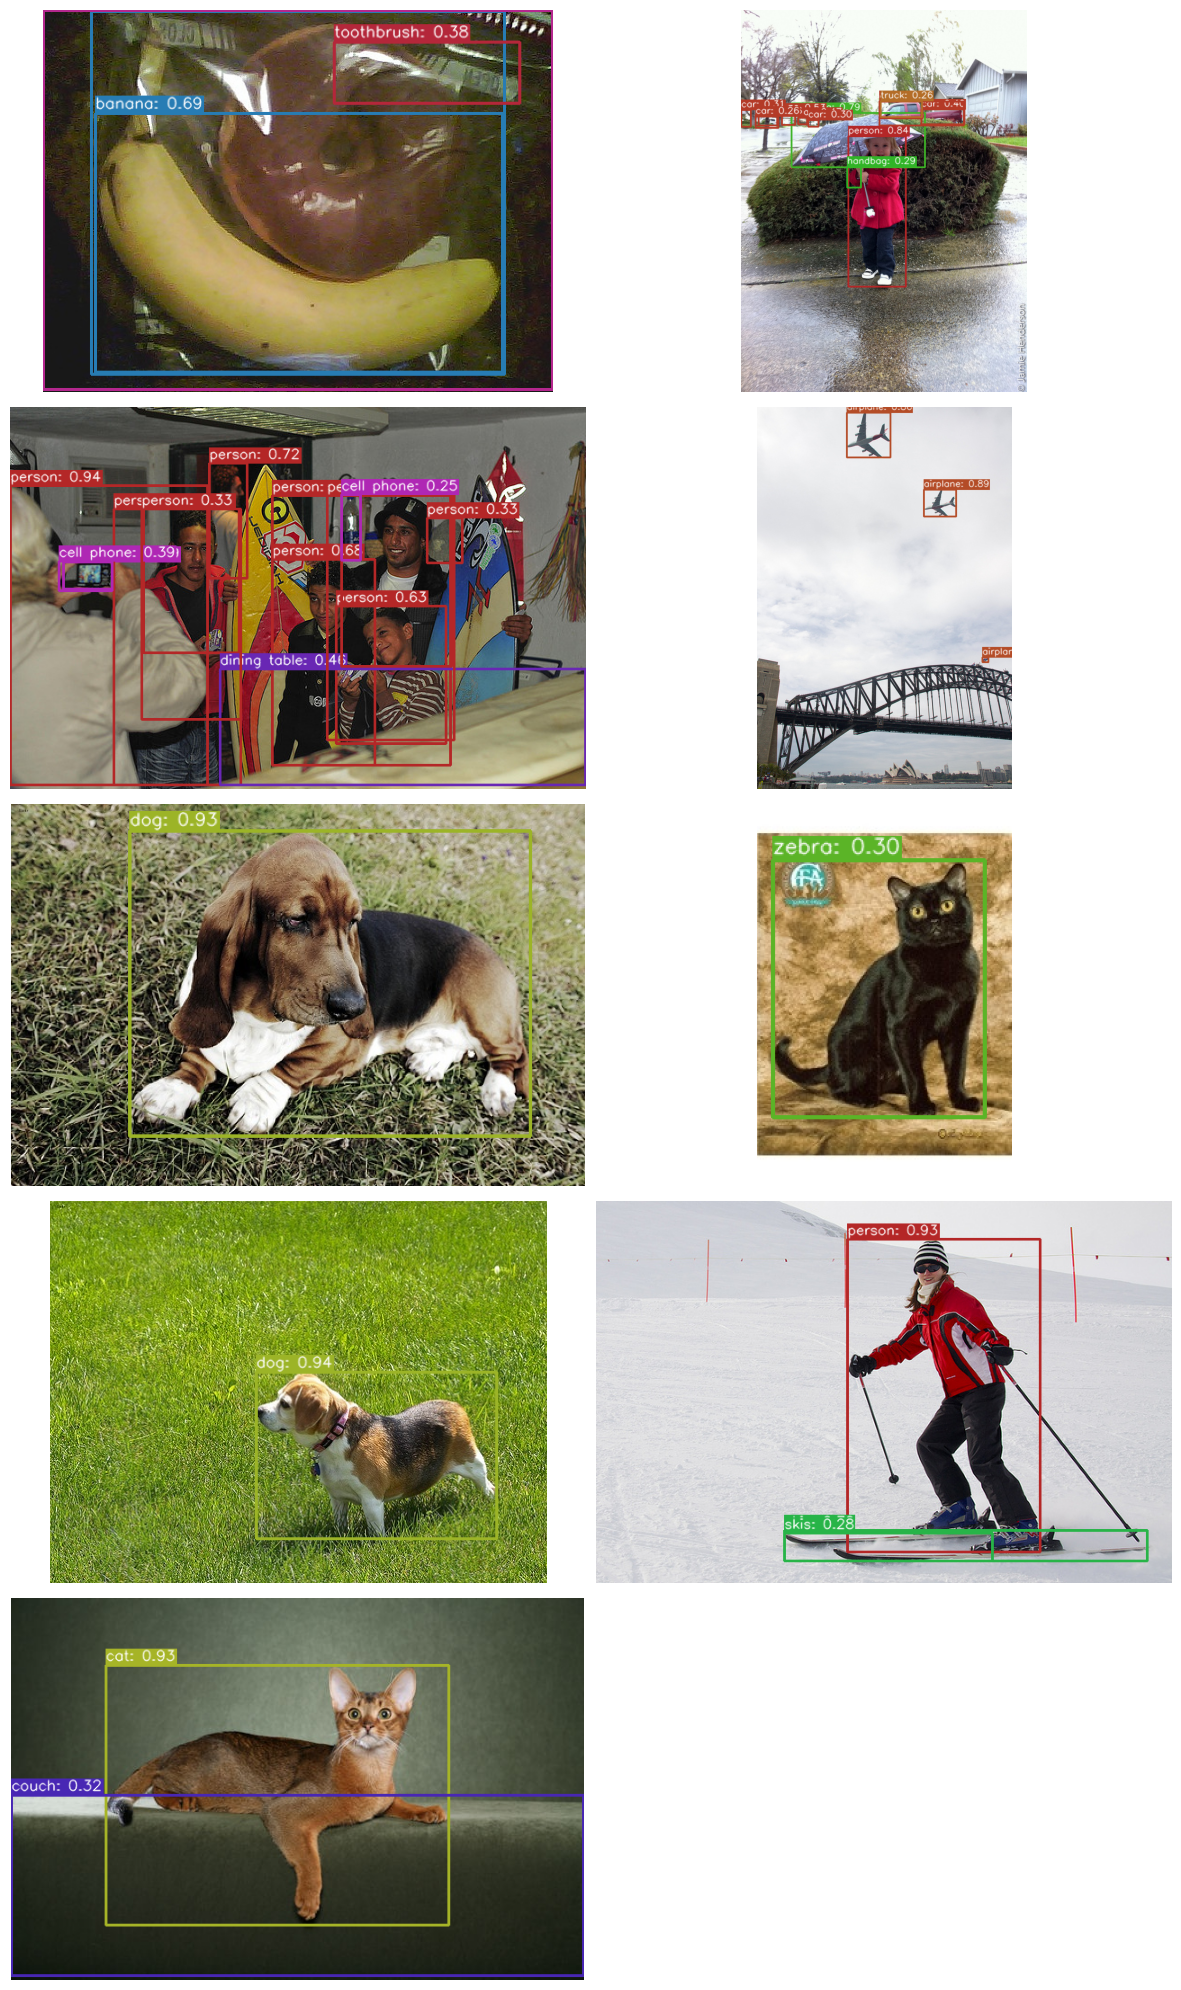

In [9]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4*n_rows))  # Adjust figure size for better visibility

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis('off')
plt.tight_layout()  # Adjust spacing between subplots
plt.show()